In [1]:
import pandas as pd #pd is the alias
import numpy as np 
import datetime
from os import listdir 
from os.path import isfile, join
import glob 
import re
import plotly.graph_objects as go
import matplotlib.pyplot as plt # Use for plotting. "plt" is an alias for calling matplotlib.pyplot
from matplotlib import style # to set the grid style 
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#read csv file
#df = free session data all
df = pd.read_csv("free_session_information.csv")
df.head()

,Unnamed: 0,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,Bangladesh
2,2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh
3,3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
4,4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India


In [3]:
#remove the Unnamed 0 column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
#reset the index
df.reset_index(drop=True)
#total null values sum
df.isna().sum()

Timestamp      20
Name           21
Contact        59
Email          22
College        28
Department     35
HasLaptop      28
Source        536
Country       492
dtype: int64

In [4]:
#total columns
df.columns

Index(['Timestamp', 'Name', 'Contact', 'Email', 'College', 'Department',
       'HasLaptop', 'Source', 'Country'],
      dtype='object')

In [5]:
df.shape

(968, 9)

# Drop all the rows where all of the columns values are NaN

In [6]:
# using dropna() function    
df1 = df.dropna(how = 'all')
df2 = df1.reset_index(drop=True)

In [7]:
df2[df2['Name'].isnull()]

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
850,Maulana Azad boot camp form 23th of jan onwars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


this rows will not be usefull for use as here all of them are NaN values except Timestamp.
Another thing timestamp value also are not well formatted

removing this specifc rows

In [8]:
#removing this specifc rows
df3 = df2.dropna(subset=['Name'])

now it is not available in the dataframe

In [9]:
# df3[df3['Contact'].isnull()]

In [10]:
# df3[df3['Email'].isnull()]

In [11]:
# df3[df3['College'].isnull()]

In [12]:
# df3[df3['Department'].isnull()]

In [13]:
# df3[df3['HasLaptop'].isnull()]

In [14]:
# df3[df3['Source'].isnull()]

In [15]:
# df3[df3['Country'].isnull()]

In [16]:
def lower_string(mystring):
    '''
    mystring is the total text of a columns where multiple white space are beeing removed and lower the all charecters
    '''
    while '  ' in mystring:
        mystring = mystring.replace('  ', ' ')
    mystring = mystring.lower()
    mystring = mystring.strip()
    return mystring

In [17]:
#importing library 
# !pip install plotly
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [18]:
def draw_trace_bar(data,data_index, feature, title, xlab, ylab,color='Blue'):
    '''
    this is the function created using plotly for draw a trace bar where
    data is main dataframe
    data index is x label values
    feature is y label values
    '''
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data[data_index],
            y = data[feature],
            marker=dict(color=color),
            text=data[data_index]
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='red'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

# We are taking the University data and Department data from which University students attends the most

In [19]:
#drop na values from college and department rows
df4 = df3.dropna(subset=['College'])
df4 = df3.dropna(subset=['Department'])

In [20]:
#converting the college and department values into string
df4.College = df3.College.astype(str)
df4.Department = df3.Department.astype(str)

In [21]:
#applying the lower string method
df4['College'] = df4.apply(lambda row : lower_string(row['College']), axis = 1)
df4['Department'] = df4.apply(lambda row : lower_string(row['Department']), axis = 1)

# Now we will workinng on college columns data

In [22]:
#collega data counting all college
college = df4.groupby('College')['College'].agg('count')
college= pd.DataFrame(college)
#renameing to total_counts of department data
college.rename(columns={"College": "counts"},inplace=True)
#convert Department index to columns
college.reset_index(inplace= True)
college

,College,counts
0,1998,1
1,aasansol girls' college,1
2,academy of technology,4
3,acharya institute of management and sciences,1
4,ahsanullah university of science and technology,2
...,...,...
292,"vivekananda college,thakurpukur",2
293,west bengal state university,1
294,west bengal university of health sciences,1
295,women's collage,1


taking the all unique college and counts them total
we are taking data which counts are greater than 3

In [23]:
collegetop = college[college['counts'] > 3]

In [24]:
#tracebar free session students present from unique university name
draw_trace_bar(collegetop,'College','counts','Free Session Student Pressent according to College', 'University Name','Total Students',"lightgreen")

# Here is a problem we can see that most of the college name are repating after applying groupby and counts.

# Now solving this repating problem convert the dataframe in csv make the all correction for college repating.
the problem is now solved

In [25]:
# college1 = college.sort_values(by = 'College', ascending=True)
# college1.to_csv(r'college_count1.csv', index = False)

after correcting the all reapting college name now we will read them count them according to college

In [26]:
#read csv file
university = pd.read_csv("college_count1.csv")
university.head()

,College,counts
0,1998,1
1,aasansol girls' college,1
2,academy of technology,4
3,acharya institute of management and sciences,1
4,ahsanullah university of science and technology,2


In [27]:
#here unique_college contain all college names uniques
#totalsum contains total counts of uniques college
unique_college = set(dic['College'] for index, dic in university.iterrows())
print(len(unique_college))
sum = 0
totalsum = []
for x in unique_college:
    for index,d in university.iterrows():
        if d['College'] == x:
            sum = sum + d['counts']
    totalsum.append((x, sum))
    sum = 0

159


In [28]:
#now this totalsum to make iit dataframe
university_name = pd.DataFrame(totalsum)
#name the columns University and counts
university_name.columns = ['University', 'counts']
university_name.reset_index(drop=True)
#sort the values
university_name.sort_values('counts', ascending=False)

,University,counts
41,lady brabourne college,139
102,maulana azad college,111
116,regent education and research foundation,109
149,b p poddar institute of management & technology,45
10,durgapur woman's college,35
...,...,...
61,sbpgc,1
59,indian institute of engineering science and te...,1
58,igidr,1
57,professional,1


In [29]:
university_top_participate = university_name[university_name['counts'] > 10]
university_less_participate = university_name[university_name['counts'] < 10]

In [30]:
draw_trace_bar(university_top_participate,'University','counts','Free Session Student Pressent from university_top_participate', 'University Name','Total Students',"lightgreen")

# Now if we take a look into the above barchart there is no repating any college or university name more than one. 
now it visualize the more about the data here only showing top participente University where participate was more than 10 students. 

In [31]:
draw_trace_bar(university_less_participate,'University','counts','Free Session Student Pressent from university_less_participate', 'University Name','Total Students',"lightgreen")

# Now if we take a look into the above barchart there is no repating any college or university name more than one. 
now it visualize the more about the data here only showing less participente University where participate was less than 10 stundet. we can take any decisions from this data for improving the participate where is less.

# Department

In [32]:
# department data counting from all department
department = df4.groupby('Department')['Department'].agg('count')
department= pd.DataFrame(department)
#renameing to total_counts of department data
department.rename(columns={"Department": "dep_counts"},inplace=True)
#convert Department index to columns
department.reset_index(inplace= True)
department

,Department,dep_counts
0,3rd year mathematics honours,1
1,3rd year statistics honours,1
2,aplied mathematics with oceanology and compute...,1
3,applied mathematics,2
4,applied mathematics in oceanology &computer ap...,1
...,...,...
152,statistics hons.,2
153,ststistics,1
154,studying m.sc in mathematics,1
155,thermal power plant engineering,1


taking the all unique department and counts them

In [33]:
# #counting university wise present
# counts = df4.College.value_counts()
# print(counts)

In [34]:
#total participate university
# unique = df4.College.unique()
# print(f"Total University:{len(unique)}")
# unique

In [35]:
#Total department under a university 
# for v in unique:
#     departments = df4.loc[df4.College == v, 'Department'].values
#     print(f"University: {v}: \nDepartment: {list(departments)}\n")

In [36]:
# # total college counts attend free session 
# college.rename(columns={"College": "counts"},inplace=True)
# # college index converted to dataframe columns
# college.head()

In [37]:
departmenttop = department[department['dep_counts'] > 2 ]
departmenttop

,Department,dep_counts
26,b.sc statistics honours,4
31,b.tech,4
43,bba,11
44,bca,6
50,bsc statistics hons,3
65,computer science,6
66,computer science and engineering,5
67,computer science engineering,3
68,cse,3
72,ece,3


# here total unique department is almost 200.
same department name are repating as  many times

In [38]:
draw_trace_bar(departmenttop,'Department','dep_counts','Free Session Student Pressent according to Department', 'Department Name','Total Students',"red")

Most of the students are from Honors(Bsc/Msc)-(337)
then Engineering student(188)

# we convert this dataframe to csv file and try as much as for reduce the repating department name

In [39]:
# department_name_all = department.sort_values(by = 'Department', ascending=True)
# department_name_all.to_csv(r'department_name_all.csv', index = False)

In [40]:
#read csv file
department_names = pd.read_csv("department_name_all.csv")
department_names.shape

(157, 2)

finally i did it from 200 to 157 unique departmnet name. 

In [41]:
# unique dep contain all unique departmnet name
unique_dep = set(dic['Department'] for index, dic in department_names.iterrows())
print(len(unique_dep))
sum = 0
#totalsum_unique_dep counts the total unique dep
totalsum_unique_dep = []
for x in unique_dep:
    for index,d in department_names.iterrows():
        if d['Department'] == x:
            sum = sum + d['dep_counts']
    totalsum_unique_dep.append((x, sum))
    sum = 0

157


In [42]:
dep_name = pd.DataFrame(totalsum_unique_dep)
dep_name.columns = ['department', 'counts']
dep_name.reset_index(drop=True)
dep_name.sort_values('counts', ascending=False)

,department,counts
122,honors (bsc/msc),337
55,engineering,188
66,others,92
139,statistics,42
136,mathematics,24
...,...,...
58,b. tech cse,1
56,b.tech ( cse ),1
54,mathematics msc.,1
53,b.com,1


In [43]:
dep_top_participate = dep_name[dep_name['counts'] > 5]
dep_less_participate = dep_name[dep_name['counts'] < 5]

In [44]:
draw_trace_bar(dep_top_participate,'department','counts','Free Session Student Pressent from department top participate more than 5 students', 'Department Name','Total Students',"red")

# now we reduce the department name now it makes sense.
for taking any decisions we can look data take decisions as required. here is showing participate students from more than 5 students according to department.

In [45]:
draw_trace_bar(dep_less_participate,'department','counts','Free Session Student Pressent from department less participate', 'Department Name','Total Students',"red")

# now we reduce the department name now it makes sense.
for taking any decisions we can look data take decisions as required. here is showing participate students from less than 5 students according to department.

# How many people had laptop and how many hadn’t and visualize them and also show those who didn’t had laptop which university are they from and from which department and their country as well. (from free session dataset)

In [46]:
df3
#haslaptop has some Nan Values so NaN values are not important as we will visulazie who has the laptop or not
df3[df3['HasLaptop'].isnull()]
#removing this specifc rows whose has Nan Values in HasLaptop columns
laptop_data = df3.dropna(subset=['HasLaptop'])
laptop_data.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India


In [47]:
def HasLaptop(value):
    """
    haslaptop columns value is yes the it will give return value 1
    if no then it will give return value 0
    """
    if value == "Yes" or value == "yes":
        return 1
    elif value == "No" or value == "no":
        return 0
    else:
        return None

In [48]:
laptop_data['laptopcount'] = laptop_data.apply(lambda row : HasLaptop(row['HasLaptop']), axis = 1)
laptop_data.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country,laptopcount
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh,1.0
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh,1.0
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India,1.0
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,India,1.0
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India,1.0


In [49]:
#student has laptop also did the total counts 
laptop_data1 = laptop_data.groupby('HasLaptop')['laptopcount'].agg('count')
laptop= pd.DataFrame(laptop_data1)
#reset the index for getting better result
laptop.reset_index(inplace=True)

In [50]:
#removing the rows
laptop1 = laptop.drop(laptop.index[[0]])
laptop1

,HasLaptop,laptopcount
1,No,205
2,Yes,734


In [51]:
#drop the values which doesnt mean anything
laptop_data.drop(laptop_data[laptop_data['HasLaptop']== "Having own laptop/system "].index , inplace=True)

<AxesSubplot:xlabel='HasLaptop', ylabel='count'>

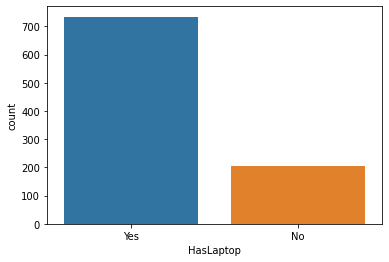

In [52]:
#ploting the data
sns.countplot(x='HasLaptop',data=laptop_data)

# So we can see that from total students who give their feedback from them 734 students have their own laptop and 205 students have no laptop

In [53]:
#we are taking the values who has not laptop
nolaptop = laptop_data[laptop_data.laptopcount == 0]
nolaptop.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country,laptopcount
7,6/24/2020 15:06:51,Abhisek biswas,NaN,amitsrivastav445@gmail.com,J.K College,B.Com (H),No,Rohan Rakshit,India,0.0
11,7/26/2020 17:51:34,Abhishek Singh,6260303830,as1973240@gmail.com,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,No,Social media,India,0.0
15,6/24/2020 15:23:11,Adarsha Mukherjee,NaN,Subratadhibar002@gmail.com,Purulia zilla school,Atrs,No,Rohan,India,0.0
26,7/27/2020 16:47:11,Amit Pal,8240247637,amitpal9685@gmail.com,Ramakrishna Mission Shilpapitha,Electronics and telecommunication,No,From my friend Rupsa,India,0.0
29,6/24/2020 16:25:25,Amit Srivastav,7384285644,Shreyaduttaxxx@gmail.com,Viswass school & college of nursing,B.sc nursing,No,NaN,India,0.0


Here drop NA vaules from college and department and applying lower string method for reducing duplicate values as possible

In [54]:
#dropna for college
nolaptop = nolaptop.dropna(subset=['College'])
#dropna for department
nolaptop = nolaptop.dropna(subset=['Department'])
#convert datatype as str for college and department
nolaptop.College = nolaptop.College.astype(str)
nolaptop.Department = nolaptop.Department.astype(str)
#applying the lower string function for colllege and department coulmns
nolaptop['College'] = nolaptop.apply(lambda row : lower_string(row['College']), axis = 1)
nolaptop['Department'] = nolaptop.apply(lambda row : lower_string(row['Department']), axis = 1)

In [55]:
#total participate university
# nolaptop_uni = nolaptop.College.unique()
# print(f" Students do not have laptop from these University Total: {len(nolaptop_uni)}")
# nolaptop_uni

In [56]:
#Total department under a university from students do not have laptop
# for v in nolaptop_uni:
#     departments = nolaptop.loc[nolaptop.College == v, 'Department'].values
#     print(f"University: {v}: \nDepartment: {list(departments)}\n")

In [57]:
#collega data counting all college
nolaptop1 = nolaptop.groupby('College')['College'].agg('count')
college_no_laptop= pd.DataFrame(nolaptop1)
#renameing to total_counts of department data
college_no_laptop.rename(columns={"College": "no_laptop_counts"},inplace=True)
college_no_laptop.reset_index(inplace=True)
college_no_laptop.sort_values("no_laptop_counts", ascending=False)
college_no_laptop.head()

,College,no_laptop_counts
0,academy of technology,1
1,aliah university,1
2,amta ramsaday college,1
3,aot,1
4,asutosh college,4


In [58]:
draw_trace_bar(college_no_laptop,'College','no_laptop_counts','Free Session total Student from University did not have laptop ', 'University Name','Total Students',"lightgreen")

# Now we can see above chart that from which university or college student do no have laptop 

In [59]:
#collega data counting all college
nolaptop2 = nolaptop.groupby('Department')['Department'].agg('count')
dep_no_laptop= pd.DataFrame(nolaptop2)
#renameing to total_counts of department data
dep_no_laptop.rename(columns={"Department": "no_laptop_counts"},inplace=True)
dep_no_laptop.reset_index(inplace=True)
dep_no_laptop.sort_values("no_laptop_counts", ascending=False)
dep_no_laptop.head()

,Department,no_laptop_counts
0,applies mathematics,1
1,atrs,1
2,b-tech (ece 2'nd year),1
3,b-tech in ece,1
4,b. tech (cse),1


In [60]:
draw_trace_bar(dep_no_laptop,'Department','no_laptop_counts','Free Session total Student from Department did not have laptop ', 'Department Name','Total Students',"lightgreen")

# from above chart we can see that from which department students do not have the laptop
where honors(bsc/msc) lead the most also bear in mind this department stundents also the most among other deparments

# According to Country 

In [61]:
#total participate Countrry
country = nolaptop.Country.unique()
country

array(['India', 'Bangladesh', nan], dtype=object)

In [62]:
#collega data counting all college
nolaptop3 = nolaptop.groupby('Country')['Country'].agg('count')
no_laptop_country= pd.DataFrame(nolaptop3)
#renameing to total_counts of department data
no_laptop_country.rename(columns={"Country": "no_laptop_counts"},inplace=True)
no_laptop_country.reset_index(inplace=True)
no_laptop_country

,Country,no_laptop_counts
0,Bangladesh,2
1,India,79


<AxesSubplot:xlabel='Country', ylabel='count'>

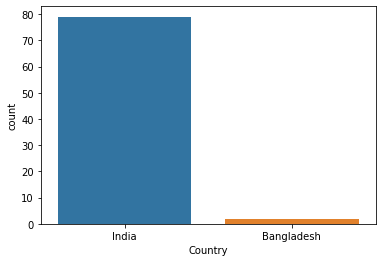

In [63]:
#ploting the data
sns.countplot(x='Country',data=nolaptop)

most of the students from india whom does not belong a laptop compared to bangladesh,
india- 79,
bangladesh- 2

# Find out all types of source of communication. Show which type is the winner. (visualize them) (from free session dataset)

In [64]:
df3[df3['Source'].isnull()]
#removing this specifc rows
source = df3.dropna(subset=['Source'])
source.head()

,Timestamp,Name,Contact,Email,College,Department,HasLaptop,Source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
5,7/28/2020 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India
6,8/20/2020 11:18:50,Abhirup Boxi,9932801949,abhirupboxi99@gmail.com,Future institute of engineering and management,Engineering,Yes,Friend,India
7,6/24/2020 15:06:51,Abhisek biswas,NaN,amitsrivastav445@gmail.com,J.K College,B.Com (H),No,Rohan Rakshit,India


In [65]:
# source columns converting as string
source.Source = source.Source.astype(str)
#applying lower string method for reducing duplicate values
source['Source'] = source.apply(lambda row : lower_string(row['Source']), axis = 1)

In [66]:
source1 = source.groupby('Source')['Source'].agg('count')
source2= pd.DataFrame(source1)
#renameing to total_counts of department data
source2.rename(columns={"Source": "counts"},inplace=True)
source2.reset_index(inplace=True)
source2

,Source,counts
0,a friend,3
1,a status was posted by a senior of my dept.see...,1
2,a whatsapp group,1
3,aiub course solution,1
4,ankita ghosh,2
...,...,...
161,whatsapp,15
162,whatsapp chat,1
163,whatsapp group,12
164,whatsapp link,1


In [67]:
#top source greater than 2 counts 
source_top = source2[source2['counts'] > 2]
source_top

,Source,counts
0,a friend,3
7,college,31
18,college whatsapp group,3
31,facebook,30
33,facebook event,4
41,fb,4
45,friend,82
50,friends,32
54,from a friend,6
58,from my friend,3


In [68]:
draw_trace_bar(source_top,'Source','counts','how did you know about us from free session student', 'Name of the Source','Total Students',"lightgreen")

# here we can see same name are repating more than once for solving this problem converting this dataframe to csv and make the correction in csv file in ms excel . here total 166 unique source available

In [69]:
# source2.sort_values("Source", ascending=False)
# source2.to_csv(r'source.csv', index = False)

In [70]:
#read csv file
source_name = pd.read_csv("source.csv")
source_name.head()

,Source,counts
0,friend,3
1,department,1
2,whatsapp,1
3,aiub course solution,1
4,ankita ghosh,2


In [71]:
# source_unique store all unique sources
source_unique = set(dic['Source'] for index, dic in source_name.iterrows())
print(len(source_unique))
sum = 0
#totalsum_source_unique counts total uniques
totalsum_source_unique = []
for x in source_unique:
    for index,d in source_name.iterrows():
        if d['Source'] == x:
            sum = sum + d['counts']
    totalsum_source_unique.append((x, sum))
    sum = 0

68


In [72]:
#make the dataframe
source_name_all = pd.DataFrame(totalsum_source_unique)
source_name_all.columns = ['Source', 'counts']
source_name_all.reset_index(drop=True)
source_name_all.sort_values('counts', ascending=False)

,Source,counts
21,friend,172
35,college,54
47,facebook,49
12,whatsapp,39
8,social media,7
...,...,...
1,subhra roy,1
36,"edc, diatm",1
37,monojit saha,1
38,other students,1


here from total 166 unique source to make the total only 68 unique row. it makes more sense

In [73]:
source_name_all_top = source_name_all[source_name_all['counts'] > 5]
source_name_all_less = source_name_all[source_name_all['counts'] < 5]

In [74]:
draw_trace_bar(source_name_all_top,'Source','counts','Source free session student counting greater than 5', 'Name of the Source','Total Students',"lightgreen")

# From above chart we can see that now there is no repating source name are not available
now we can take better decission from this data. here counts the total source more than 5.

In [75]:
draw_trace_bar(source_name_all_less,'Source','counts','how did you know about us from free session student', 'Name of the Source','Total Students',"lightgreen")

# From above chart we can see that now there is no repating source name are not available
now we can take better decission from this data. here counts the total source less than 5.